# Brain Tumor Classification

Agnibh Pathak : 2248002 , Abir Dey: 2248001, Bratasee Bhunia: 2248033

**In this project, we are trying to classify the different types of Brain Tumor. For that we have taken a dataset from Kaggle. The folder contains MRI data. The images are already split into Training and Testing folders. Each folder has more four subfolders. These folders have MRIs of respective tumor classes which are Glioma, Pituitary, Meningioma and Absence of tumor.
Link : https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri**

### Importing the Libraries

In [1]:
import os #used to access files
import numpy as np
import cv2 #OpenCV library used for preprocessing image data
import imutils

### Importing the Data and Storing it as test and train, displaying the labels

In [2]:
train_data =r"C:\Users\agnib\Downloads\braintumor\Training"
test_data = r"C:\Users\agnib\Downloads\braintumor\Testing"

labels=os.listdir(train_data) #loading the labels of the data present in the folder
categories=np.arange(len(labels)) #generating keys for labels
category_dict=dict(zip(labels,categories)) #converting into key: labels dictionary


labels1=os.listdir(test_data) #loading the labels of the data present in the folder
categories1=np.arange(len(labels1)) #generating keys for labels
category_dict1=dict(zip(labels1,categories1)) #converting into key: labels dictionary

print("lables=",labels)
print("categories=",categories)
print("category_dict=",category_dict)
print("\n\n")
print("lables=",labels1)
print("categories=",categories1)
print("category_dict=",category_dict1)

lables= ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
categories= [0 1 2 3]
category_dict= {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}



lables= ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
categories= [0 1 2 3]
category_dict= {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


Thus over here we are encoding Glioma Tumor as 0, Meningioma Tumor as 1, No Tumor as 2 and Pituitary Tumor as 3

### Counting number of images in each label

In [3]:

# Set the path to the directory containing the folders of images
dir_path = train_data

# Loop through each folder in the directory
for folder in os.listdir(dir_path):
    
    # Set the path to the current folder
    folder_path = os.path.join(dir_path, folder)
    
    # Check if the current path is a directory
    if os.path.isdir(folder_path):
        
        # Count the number of files in the current directory with a .jpg or .png extension
        num_files = len([file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')])
        
        # Print the number of files in the current directory
        print(f"{folder}: {num_files}")


glioma_tumor: 826
meningioma_tumor: 822
no_tumor: 395
pituitary_tumor: 827


In [4]:
# Set the path to the directory containing the folders of images
dir_path = test_data

# Loop through each folder in the directory
for folder in os.listdir(dir_path):
    
    # Set the path to the current folder
    folder_path = os.path.join(dir_path, folder)
    
    # Check if the current path is a directory
    if os.path.isdir(folder_path):
        
        # Count the number of files in the current directory with a .jpg or .png extension
        num_files = len([file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')])
        
        # Print the number of files in the current directory
        print(f"{folder}: {num_files}")


glioma_tumor: 100
meningioma_tumor: 115
no_tumor: 105
pituitary_tumor: 74


Thus we have 2870 images in the Training Images, where 826 **Glioma Tumors**, 822 **Meningioma Tumor**, 395 **No Tumor**, 827 **Pituitary Tumor** and 384 Testing Images where 100 **Glioma Tumors**, 115 **Meningioma Tumor**, 105 **No Tumor**, 74 **Pituitary Tumor** 

## Pre-Processing for VGG-16

  For the Pre-Processing, the function preproces_input() from Keras is used with respect to VGG 

In [50]:
import keras
from tensorflow.keras.applications.vgg16 import preprocess_input 
os.chdir(os.path.expanduser("~"))

In [98]:
pip install keras_preprocessing

Note: you may need to restart the kernel to use updated packages.


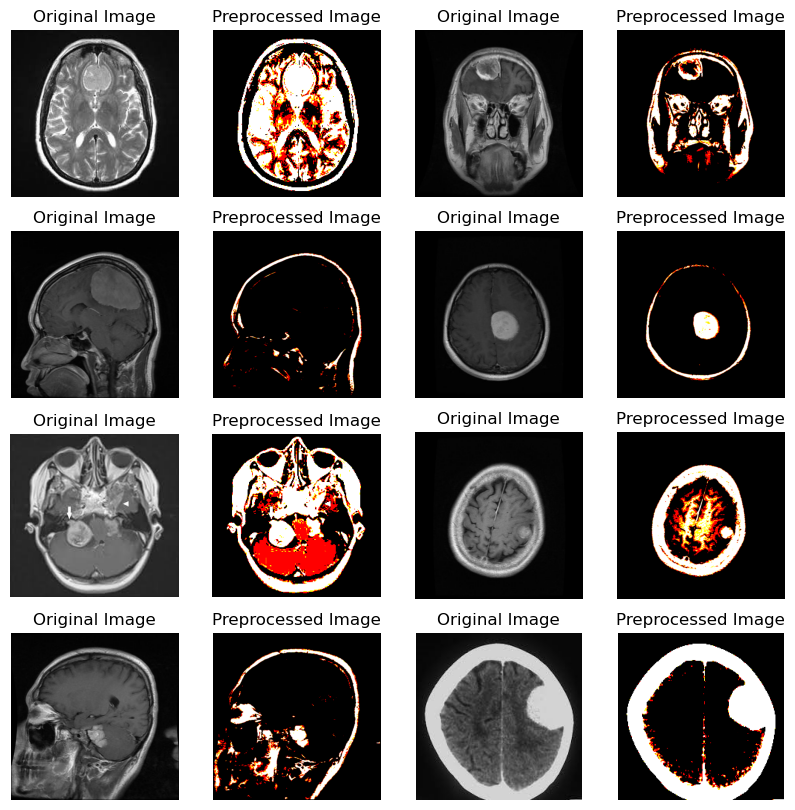

In [103]:
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import load_img
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# Set path to folder containing images
folder_path = r"C:\Users\agnib\Downloads\braintumor\Training\meningioma_tumor"

# Load all images from folder into list
image_names = os.listdir(folder_path)
images = []
for name in image_names:
    img = load_img(os.path.join(folder_path, name))
    images.append(img)

# Display 8 random images with corresponding pre-processed images
plt.figure(figsize=(10,10))
for i in range(8):
    # Select random image
    random_idx = random.randint(0, len(images)-1)
    img = images[random_idx]
    
    # Preprocess image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Display original image
    plt.subplot(4,4,i*2+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Original Image")

    # Display preprocessed image
    plt.subplot(4,4,i*2+2)
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.title("Preprocessed Image")
plt.show()

Over here we first pre-process the image for the VGG model, and we prepare the data bringing it to a size of 224,224

In [25]:
def get_data_generator(train_data_path, \
                       val_data_path, \
                       targetsize, \
                       classmode, \
                       batchsize):
    """
    This function is a data generator function for train, validation
    Inputs
        train_data_path   : train data path for the dataset 
        val_data_path     : validation data path for the dataset
        targetsize        : target size for the generator to resize all images to, (224,224)
        classmode         : class mode, 'categorical'
        batchsize         : batch size
    Outputs
        train_generator   : generated train data
        val_generator   : generated train data
    
    """
    train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    
    train_generator=train_datagen.flow_from_directory(train_data_path, # this is where you specify the path to the main data folder
                                                 target_size=targetsize,
                                                 color_mode='rgb',
                                                 batch_size=batchsize,
                                                 class_mode=classmode,
                                                 shuffle=True)
    
    val_generator=val_datagen.flow_from_directory(val_data_path, # this is where you specify the path to the main data folder
                                                 target_size=targetsize,
                                                 color_mode='rgb',
                                                 batch_size=batchsize,
                                                 class_mode=classmode,
                                                 shuffle=True)
    return train_generator,val_generator   



train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

'''
Initial and constant parameters for the model
initial parameters
       batch_size    : the initial batch size we will create our base model with
Constant parameters
       target_size   : Constant image target size for the whole notebook which is (224,224)
       class_mode    : class mode we will use for the whole notebook, which is 'categorical'
'''
# constant parameters
targetsize_constant = (224,224)
classmode_constant = 'categorical'

# initial parameters
batchsize_initial = 8
epochs_initial = 4
dropout_value_initial = 0.5
optimizer_initial = 'Adam'

# Data paths
train_dataset_path = r"C:\Users\agnib\Downloads\braintumor\Training"
validation_dataset_path = r"C:\Users\agnib\Downloads\braintumor\Testing"



train_generator_initial = train_datagen.flow_from_directory(train_dataset_path, # this is where you specify the path to the main data folder
                                                 target_size=targetsize_constant,
                                                 color_mode='rgb',
                                                 batch_size=batchsize_initial,
                                                 class_mode=classmode_constant,
                                                 shuffle=True)
val_generator_initial = val_datagen.flow_from_directory(validation_dataset_path, # this is where you specify the path to the main data folder
                                                 target_size=targetsize_constant,
                                                 color_mode='rgb',
                                                 batch_size=batchsize_initial,
                                                 class_mode=classmode_constant,
                                                 shuffle=True)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [26]:
image_size = [224,224] # choose image size
# import the base model

## Model Building with VGG-16

We set the batch size to 8 with 10 as the number of epochs. Relu activation layers are added. We are using SGD optimiser with a learning rate of 0.001. Also we are using callbacks to save the best model after each epoch with respect to the validation accuracy.

In [104]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


# Set the input image dimensions and number of output classes
img_width, img_height = 256, 256
num_classes = 4

# Set the batch size and number of epochs for training
batch_size = 8
num_epochs = 10

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

# Add a new classification layer with the number of output classes
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model by combining the base VGG16 model with the new classification layer
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the weights of the base VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



# Load the training data from the directories for each class
train_generator = train_datagen.flow_from_directory(r"C:\Users\agnib\Downloads\braintumor\Training",
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')



# Load the validation data from the directories for each class
val_generator = val_datagen.flow_from_directory(r"C:\Users\agnib\Downloads\braintumor\Testing",
                                                target_size=(img_width, img_height),
                                                batch_size=batch_size,
                                                class_mode='categorical')

# Define callbacks to save the model at each epoch and the best model based on validation accuracy
checkpoint_filepath = 'checkpoint.h5'
best_model_filepath = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_best_only=False,
    save_freq='epoch'
)
best_model_callback = ModelCheckpoint(
    filepath=best_model_filepath,
    save_weights_only=False,
    save_best_only=True,
    save_freq='epoch',
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Train the model on the training data and validate on the validation data

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint_callback, best_model_callback]
)

# Evaluate the best model on the validation set
best_model = tf.keras.models.load_model(best_model_filepath)
val_loss, val_acc = best_model.evaluate(val_generator, steps=val_generator.samples // batch_size)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)


model_name = 'vgg_braintumor'
best_model.save(model_name)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10
358/358 [==============================] - ETA: 0s - loss: 0.7138 - accuracy: 0.7271
Epoch 1: val_accuracy improved from -inf to 0.58418, saving model to best_model.h5
358/358 [==============================] - 344s 961ms/step - loss: 0.7138 - accuracy: 0.7271 - val_loss: 1.0570 - val_accuracy: 0.5842
Epoch 2/10
358/358 [==============================] - ETA: 0s - loss: 0.4092 - accuracy: 0.8505
Epoch 2: val_accuracy improved from 0.58418 to 0.64286, saving model to best_model.h5
358/358 [==============================] - 335s 936ms/step - loss: 0.4092 - accuracy: 0.8505 - val_loss: 1.1922 - val_accuracy: 0.6429
Epoch 3/10
358/358 [==============================] - ETA: 0s - loss: 0.3181 - accuracy: 0.8843
Epoch 3: val_accuracy improved from 0.64286 to 0.65306, saving model to best_model.h5
358/358 [==============================] - 334s 932ms/step - loss: 0.3181 - accuracy: 0.8843 - val_loss:

INFO:tensorflow:Assets written to: vgg_braintumor\assets


INFO:tensorflow:Assets written to: vgg_braintumor\assets


In [115]:
history

In [28]:
model.save(r'C:\Users\agnib\Downloads\braintumor\model') 

INFO:tensorflow:Assets written to: C:\Users\agnib\Downloads\braintumor\model\assets


INFO:tensorflow:Assets written to: C:\Users\agnib\Downloads\braintumor\model\assets


## Plottings for VGG16 Model

**Graph of Validation Accuracy vs Accuracy over each epoch**

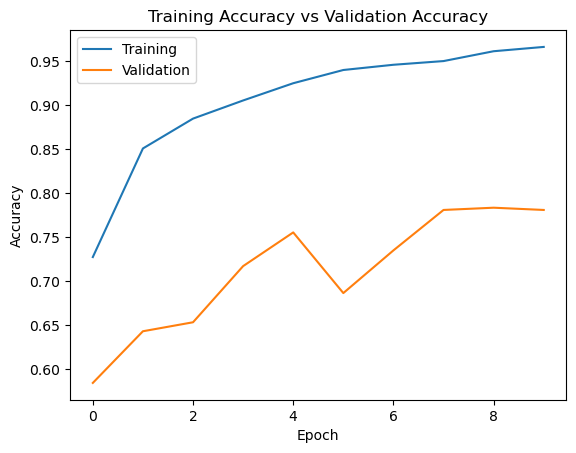

In [108]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy as a function of epochs
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

**Graph of Traning Loss and Validation Loss over each epoch**

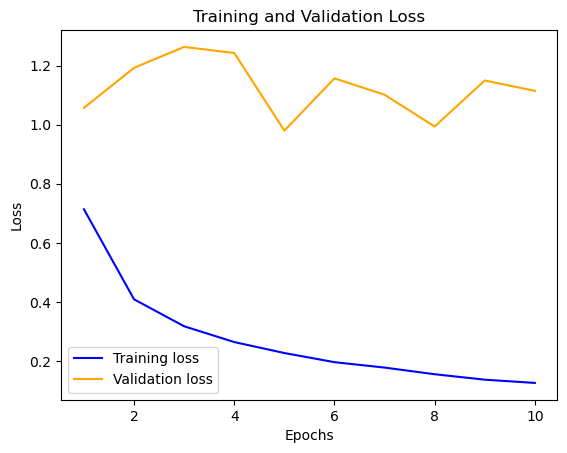

In [125]:
import matplotlib.pyplot as plt

# training and validation loss values
train_loss = [0.7138, 0.4092, 0.3181, 0.2647, 0.2276, 0.1967, 0.1784, 0.1559, 0.1375, 0.1265]
val_loss = [1.0570, 1.1922, 1.2629, 1.2424, 0.9797, 1.1565, 1.1013, 0.9937, 1.1494, 1.1144]

# plot the training and validation loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plotting Confusion Matrix**

C:\Users\agnib\AppData\Local\Temp\ipykernel_2060\262873409.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(val_generator)


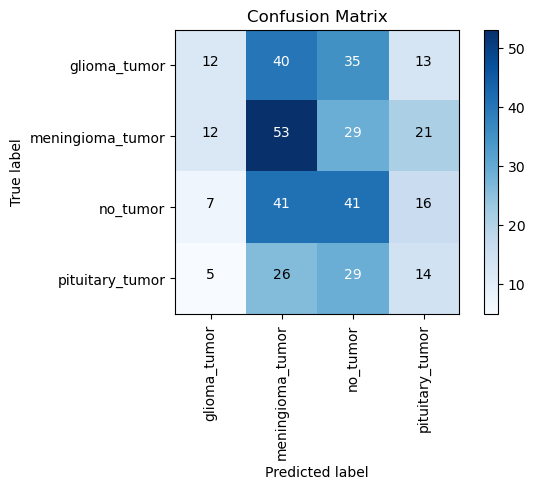

In [107]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


# Use the model to predict the class probabilities for the test data
y_pred = model.predict_generator(val_generator)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true = val_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_generator.class_indices))
plt.xticks(tick_marks, val_generator.class_indices, rotation=90)
plt.yticks(tick_marks, val_generator.class_indices)
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Pre-Processing for ResNet50

Similar to VGG16, using the Keras Function preprocess_input(), we are preparing the images.

## Model Building with ResNet50

With the same batch size of 8 and 10 as the number of epochs, we are building the model with ResNet50. We are using Adam optimiser over a learning rate of 0.001. At every epoch we are comparing and saving the best model with respect to the validation accuracy

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50


# Set parameters for image preprocessing and data augmentation
img_width, img_height = 256,256
batch_size = 8


# Load the pre-trained ResNet-50 model and modify the last layer for custom dataset
model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
for layer in model.layers:
    layer.trainable = False
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)

optimizer = tf.keras.optimizers.Adam(lr=0.001)
# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
epochs = 10


# Define callbacks to save the model at each epoch and the best model based on validation accuracy
checkpoint_filepath = 'checkpoint.h5'
best_model_filepath = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_best_only=False,
    save_freq='epoch'
)
best_model_callback = ModelCheckpoint(
    filepath=best_model_filepath,
    save_weights_only=False,
    save_best_only=True,
    save_freq='epoch',
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

# Train the model on the training data and validate on the validation data

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint_callback, best_model_callback]
)

# Evaluate the best model on the validation set
best_model = tf.keras.models.load_model(best_model_filepath)



Epoch 1/10
358/358 [==============================] - ETA: 0s - loss: 0.5275 - accuracy: 0.7952
Epoch 1: val_accuracy improved from -inf to 0.63776, saving model to best_model.h5
358/358 [==============================] - 196s 540ms/step - loss: 0.5275 - accuracy: 0.7952 - val_loss: 1.2937 - val_accuracy: 0.6378
Epoch 2/10
358/358 [==============================] - ETA: 0s - loss: 0.3076 - accuracy: 0.8749
Epoch 2: val_accuracy improved from 0.63776 to 0.69133, saving model to best_model.h5
358/358 [==============================] - 196s 547ms/step - loss: 0.3076 - accuracy: 0.8749 - val_loss: 1.2528 - val_accuracy: 0.6913
Epoch 3/10
358/358 [==============================] - ETA: 0s - loss: 0.2175 - accuracy: 0.9144
Epoch 3: val_accuracy improved from 0.69133 to 0.69388, saving model to best_model.h5
358/358 [==============================] - 192s 535ms/step - loss: 0.2175 - accuracy: 0.9144 - val_loss: 1.5289 - val_accuracy: 0.6939
Epoch 4/10
358/358 [==============================] 

NameError: name 'val_generator1' is not defined

In [65]:
val_loss, val_acc = best_model.evaluate(val_generator, steps=val_generator.samples // batch_size)
print('Validation loss:', val_loss)
print('Validation accuracy:', val_acc)


model_name = 'resnet_braintumor'
best_model.save(model_name)


49/49 [==============================] - 24s 466ms/step - loss: 1.4388 - accuracy: 0.8010
Validation loss: 1.438828945159912
Validation accuracy: 0.8010203838348389


INFO:tensorflow:Assets written to: resnet_braintumor\assets


INFO:tensorflow:Assets written to: resnet_braintumor\assets


In [74]:

# Save the trained model for later use
best_model.save(r'C:\Users\agnib\Downloads\braintumor\model_rn')


INFO:tensorflow:Assets written to: C:\Users\agnib\Downloads\braintumor\model_rn\assets


INFO:tensorflow:Assets written to: C:\Users\agnib\Downloads\braintumor\model_rn\assets


## Plottings for ResNet50

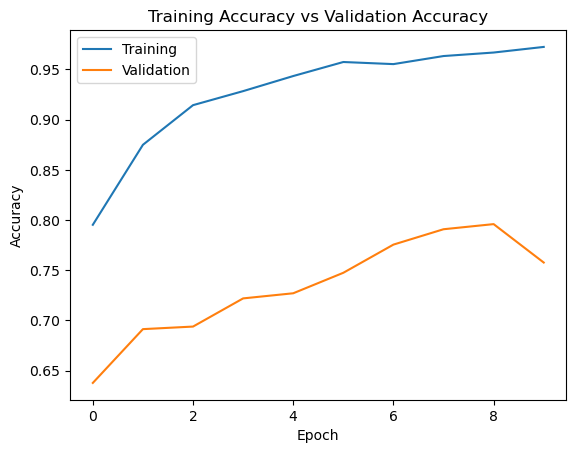

In [72]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy as a function of epochs
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

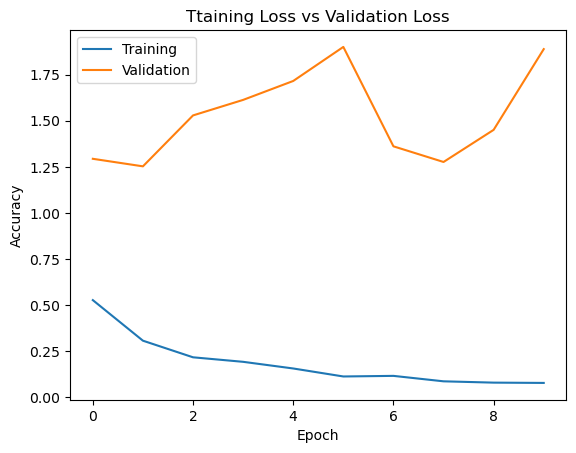

In [70]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation accuracy as a function of epochs
plt.plot(training_loss)
plt.plot(validation_loss)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title("Ttaining Loss vs Validation Loss")
plt.show()


C:\Users\agnib\AppData\Local\Temp\ipykernel_2060\289857057.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(val_generator)


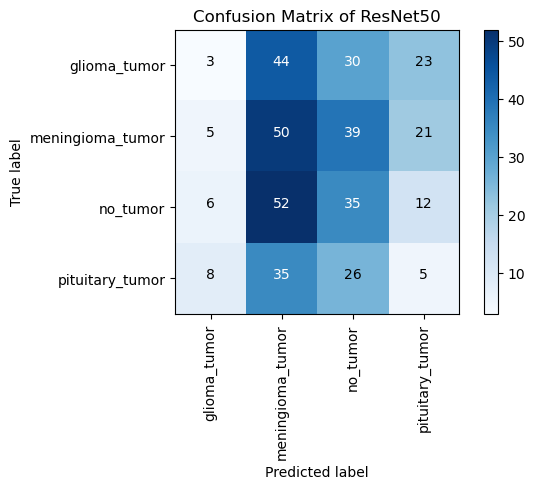

In [80]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


# Use the model to predict the class probabilities for the test data
y_pred = model.predict_generator(val_generator)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels for the test data
y_true =val_generator.classes

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(val_generator.class_indices))
plt.xticks(tick_marks, val_generator.class_indices, rotation=90)
plt.yticks(tick_marks, val_generator.class_indices)
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of ResNet50")
plt.show()